# Scientific Libraries, Monte Carlo, and More Linear Algebra Exercises

<div align="right"><button><a href="https://colab.research.google.com/github/QuantEcon/workshop.africa-july2023/blob/main/day-04/exercise_set_4.ipynb"><img src="" heght="10px"/><img
    src="https://colab.research.google.com/assets/colab-badge.svg"
    alt="open with Colab" width="100px"/></a></button></div>

#### Written for the QuantEcon Africa Workshop (July 2023)
#### Author: [Smit Lunagariya](https://github.com/Smit-create), [Humphrey Yang](https://github.com/HumphreyYang) and [Shu Hu](https://shu-hu.com/)

This notebook contains the exercises on scientific libraries, Monte Carlo simulation, and eigenvalues and eigenvectors.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eig
from numpy.random import randn

## Exercises

Before you attempt these exercises, we recommend that you read

1. the [lecture on NumPy](https://python-programming.quantecon.org/numpy.html),
2. the [lecture on Matplotlib](https://python-programming.quantecon.org/matplotlib.html) and
3. the [lecture on SciPy](https://python-programming.quantecon.org/scipy.html).
4. the [lecture on Eigenvalues and Eigenvectrors](https://intro.quantecon.org/eigen_I.html).
5. the [An introduction to Monte Carlo](https://intro.quantecon.org/monte_carlo.html#an-introduction-to-monte-carlo)

### Exercise 1

Given a matrix $A$, compute the eigenvalues and eigenvectors and plot them.

In [2]:
A = np.array([[1, 4], [5, 7]])
A

array([[1, 4],
       [5, 7]])

In [3]:
evals, evecs = eig(A)
print("eigenvalues:\n", evals)
print("eigenvectors:\n", evecs)

eigenvalues:
 [-1.38516481+0.j  9.38516481+0.j]
eigenvectors:
 [[-0.85889508 -0.43055332]
 [ 0.51215158 -0.90256514]]


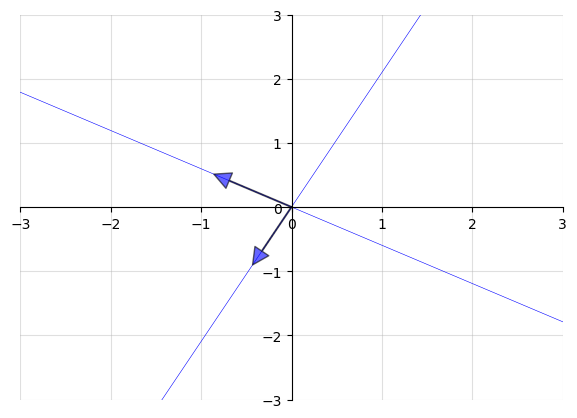

In [4]:
evecs = evecs[:, 0], evecs[:, 1]

fig, ax = plt.subplots(figsize=(7, 5))

# Set the axes through the origin
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
for spine in ['right', 'top']:
    ax.spines[spine].set_color('none')

ax.grid(alpha=0.4)

xmin, xmax = -3, 3
ymin, ymax = -3, 3
ax.set(xlim=(xmin, xmax), ylim=(ymin, ymax))

# Plot each eigenvector
for v in evecs:
    ax.annotate('', xy=v, xytext=(0, 0),
                arrowprops=dict(facecolor='blue',
                shrink=0,
                alpha=0.6,
                width=0.5))

# Plot the lines they run through
x = np.linspace(xmin, xmax, 3)
for v in evecs:
    a = v[1] / v[0]
    ax.plot(x, a * x, 'b-', lw=0.4)

plt.show()

### Exercise 2

In this exercise, 

1. Draw 1000 independent draws from the standard normal distribution using [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html).

2. Calculate the sample mean and variance of the draws and compare them to the theoretical values.

3. Visualize the empirical distribution of the draws using a histogram. Mark the sample mean and $\pm$ one standard deviation using vertical lines.

4. Calculate the probability that a draw from the distribution is less than 0 and compare it to the proportion of the sample that is less than 0.

5. How do the results in question 3 change with different sample sizes? Try to draw 10, 100, 500, 1000, and 10000 samples, each with 100 times and plot the results.

Use the following imports to get started.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

### Solution

**Exercise 2.1**

In [6]:
# Define the parameters of the standard normal distribution
mu = 0
sigma = 1

# Generate a sample of 10000 draws from the normal distribution
samples = norm.rvs(mu, sigma, size=10_000)

**Exercise 2.2**

In [7]:
# Calculate the mean and standard deviation of the sample
mean = np.mean(samples)
std = np.std(samples)

print("Sample mean: {:.4f}".format(mean))
print("Theoretical mean: {:.4f}".format(mu))
print("Sample standard deviation: {:.4f}".format(std))
print("Theoretical standard deviation: {:.4f}".format(sigma))


Sample mean: -0.0086
Theoretical mean: 0.0000
Sample standard deviation: 1.0021
Theoretical standard deviation: 1.0000


**Exercise 2.3**

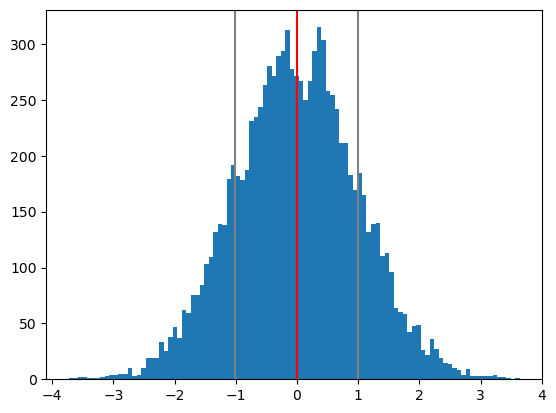

In [8]:
# Plot the histogram of the sample
plt.hist(samples, bins=100)
plt.axvline(mean, color='red')
plt.axvline(mean + std, color='grey')
plt.axvline(mean - std, color='grey')
plt.show()

**Exercise 2.4**

In [9]:
# Calculate the probability that a draw from the distribution is less than 0
probability = norm.cdf(0, mu, sigma)

print("The probability that a draw from the distribution is less than 0 is:", probability)

# Calculate the proportion of samples is less than 0
proportion = np.mean(samples < 0)

print("The proportion of samples is less than 0 is:", proportion)

The probability that a draw from the distribution is less than 0 is: 0.5
The proportion of samples is less than 0 is: 0.506


**Exercise 2.5**

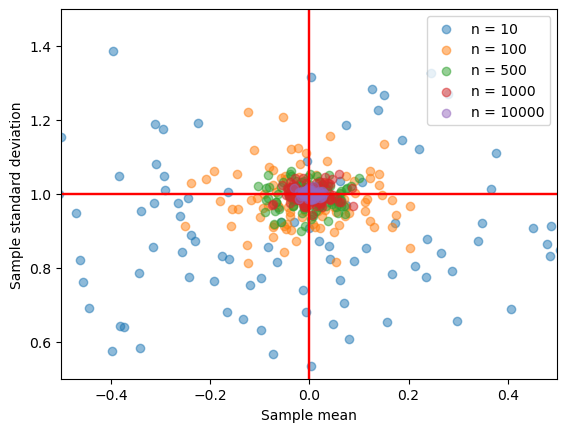

In [10]:
# Create a function that draws n samples from 
# the standard normal distribution and returns 
# mean and starndard deviation
def draw_samples(n):
    samples = norm.rvs(mu, sigma, size=n)
    mean = np.mean(samples)
    std = np.std(samples)
    return mean, std

sample_sizes = [10, 100, 500, 1000, 10_000]
sizes_arr = np.repeat(sample_sizes, 100)

# Draw 100 samples for each sample size using vectorized numpy code
means, stds = np.vectorize(draw_samples)(sizes_arr)
means, stds = means.reshape(5, 100), stds.reshape(5, 100)

for i in range(5):
    # Plot scatter plot of means and standard deviations
    plt.scatter(means[i], stds[i], alpha=0.5, 
                label="n = {}".format(sample_sizes[i]))
    plt.axhline(sigma, color='red')
    plt.axvline(mu, color='red')
    plt.xlabel("Sample mean")
    plt.ylabel("Sample standard deviation")
    plt.legend()
    # Limit the axis to zoom in on the plot
    plt.xlim(-0.5, 0.5)
    plt.ylim(0.5, 1.5)


### Exercise 3

Consider a random variable $S$ in the following form

$$
S = \left ( \sum^M_{i=1} X_i \right )^p
$$

where $X_i \sim LN (\mu_i, \sigma_i)$, $M\in \mathbb N$ and $p$ is a positive number known to us.

#### Exercise 3.1

First let $M=1$ and $p=1$. Now we have

$$
    S = X_1
$$
where $X_1 \sim LN (\mu_1, \sigma_1)$.

Answer the following questions:

**Exercise 3.1.1**

Write down the analytical solutions to $\mathbb E S$ and $\mathop{\mathrm{Var}} S$.

**Solution to Exercise 3.1.1**

See section [*Share price with known distribution*](https://intro.quantecon.org/monte_carlo.html#share-price-with-known-distribution).

**Exercise 3.1.2**

Define two Python functions `mean_analytical` and `var_analytical` to compute the $\mathbb E S$ and $\mathop{\mathrm{Var}} S$ directly according to their analytical solutions.

**Solution to Exercise 3.1.2**

In [11]:
def mean_analytical(μ_1, σ_1):
    return np.exp(μ_1 + σ_1 ** 2 / 2)

In [12]:
def var_analytical(μ_1, σ_1):
    return (np.exp(σ_1 ** 2) - 1) * np.exp(2 * μ_1 + σ_1 ** 2)

**Exercise 3.1.3**

Given 

In [13]:
n = 1_000_000
p = 1
μ_1 = 0.2
σ_1 = 0.1

Approximate $\mathbb E S$ by Monte Carlo simulation using loop. 

Compare the result with the analytical solution.

Hint. 
$$
\mathbb E S \approx  
\frac{1}{n} \sum_{i=1}^n S_i    
$$

**Solution to Exercise 3.1.3**

In [14]:
S = 0.0
for i in range(n):
    X_1 = np.exp(μ_1 + σ_1 * randn())
    S += (X_1)**p
S_mean_mc = S / n
S_mean_analytical = mean_analytical(μ_1, σ_1)

In [15]:
print("Monte Carlo simulation of ES in loop is ", S_mean_mc)  
print("Analytical solution result of ES is ", S_mean_analytical)

Monte Carlo simulation of ES in loop is  1.2275352932649395
Analytical solution result of ES is  1.2275250649631777


**Exercise 3.1.4**

With the same setup

In [16]:
n = 1_000_000
p = 1
μ_1 = 0.2
σ_1 = 0.1

and given $\mathbb ES$, approximate $\mathop{\mathrm{Var}} S$ by Monte Carlo simulation.

Compare it with the analytical solution.

Hint. Note that $\mathop{\mathrm{Var}} S = \mathbb E \left [S - \mathbb E S \right ]^2$.

**Solution to Exercise 3.1.4**

We can use the result of either analytical solution or Monte Carolo simulation for $\mathbb S$.

In [17]:
S = 0.0
for i in range(n):
    X_1 = np.exp(μ_1 + σ_1 * randn())
    S += ((X_1)**p - S_mean_analytical) ** 2 
S_var_mc = S / n

In [18]:
S_var_analytical = var_analytical(μ_1, σ_1)

In [19]:
print("Monte Carlo simulation of VarS in loop is ", S_var_mc)  
print("Analytical solution result of VarS is ", S_var_analytical)

Monte Carlo simulation of VarS in loop is  0.015137069338561711
Analytical solution result of VarS is  0.015143770505780056


**Exercise 3.1.5**

With the same setup

In [20]:
n = 1_000_000
p = 1
μ_1 = 0.2
σ_1 = 0.1

Rewrite the loops in Exercises 1.1.3 and 1.1.4 with vectorization.

**Solution to Exercise 3.1.5**

First $\mathbb E S$.

In [21]:
X_1 = np.exp(μ_1 + σ_1 * randn(n))
S = (X_1)**p
S_mean_mc = S.mean()
print("Monte Carlo simulation of ES in vectorization is ", S_mean_mc)  

Monte Carlo simulation of ES in vectorization is  1.2275387841964567


Then $\mathop{\mathrm{Var}} S$.

In [22]:
X_1 = np.exp(μ_1 + σ_1 * randn(n))
S = ((X_1)**p - S_mean_analytical) ** 2
S_var_mc = S.mean()
print("Monte Carlo simulation of VarS in vectorization is ", S_var_mc) 

Monte Carlo simulation of VarS in vectorization is  0.015120864732904174


#### Exercise 3.2

Let $M=3$. Then we have

$$
    S = (X_1 + X_2 + X_3)^p
$$
which is the same form as our lecture [here](https://intro.quantecon.org/monte_carlo.html#share-price-with-unknown-distribution).

Now we don't have analytical solutions for $\mathbb E S$ and $\mathop{\mathrm{Var}} S$.

We use the following values for $ p $ and each $ \mu_i $ and $ \sigma_i $.

In [23]:
n = 1_000_000
p = 0.5
μ_1, μ_2, μ_3 = 0.2, 0.8, 0.4
σ_1, σ_2, σ_3 = 0.1, 0.05, 0.2

In [24]:
def compute_mean_vectorized(n=1_000_000):
    X_1 = np.exp(μ_1 + σ_1 * randn(n))
    X_2 = np.exp(μ_2 + σ_2 * randn(n))
    X_3 = np.exp(μ_3 + σ_3 * randn(n))
    S = (X_1 + X_2 + X_3)**p
    return S.mean()

In [25]:
S_mean_mc_new = compute_mean_vectorized(n)
print("Monte Carlo simulation of ES in vectorization is ", S_mean_mc_new)  

Monte Carlo simulation of ES in vectorization is  2.2295991910185085


**Exercise 3.2.1** 

Given the monte carlo simulation of $\mathbb ES$, approximate $\mathop{\mathrm{Var}} S$ by Monte Carlo simulation using loop.

**Solution to Exercise 3.2.1**

In [26]:
S = 0.0
for i in range(n):
    X_1 = np.exp(μ_1 + σ_1 * randn())
    X_2 = np.exp(μ_2 + σ_2 * randn())
    X_3 = np.exp(μ_3 + σ_3 * randn())
    S += ((X_1 + X_2 + X_3)**p - S_mean_mc_new) ** 2
S_var_mc_new_loop = S / n

In [27]:
print("Monte Carlo simulation of VarS in loop is", S_var_mc_new_loop) 

Monte Carlo simulation of VarS in loop is 0.006055612497772833


**Exercise 3.2.2**

Rewrite the loop in Exercise 3.2.1 with vectorization.

**Solution to Exercise 3.2.2**

In [28]:
X_1 = np.exp(μ_1 + σ_1 * randn(n))
X_2 = np.exp(μ_2 + σ_2 * randn(n))
X_3 = np.exp(μ_3 + σ_3 * randn(n))
S = ((X_1 + X_2 + X_3)**p - S_mean_mc_new) ** 2
S_var_mc_new = S.mean()

In [29]:
print("Monte Carlo simulation of VarS in vectorization is", S_var_mc_new) 

Monte Carlo simulation of VarS in vectorization is 0.006069779239540529


### Exercise 4

Simulate and plot the correlated time series

$$
    x_{t+1} = \alpha \, x_t + \epsilon_{t+1}
    \quad \text{where} \quad
    x_0 = 0 
    \quad \text{and} \quad t = 0,\ldots,T
$$

Here $\{\epsilon_t\}$ is iid and standard normal.

In your solution, restrict your import statements to

In [30]:
from random import normalvariate
import matplotlib.pyplot as plt

Set $T=200$ and $\alpha = 0.9$

### Solution

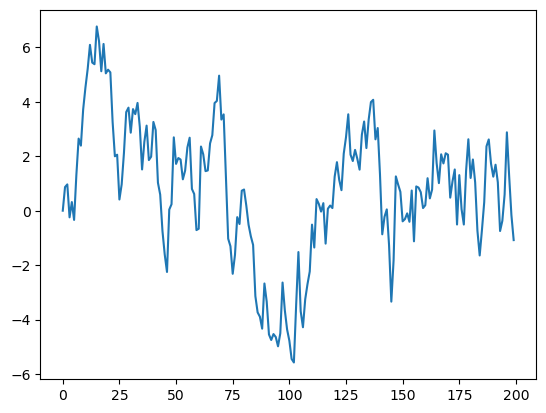

In [31]:
import random
# Set random seed to replicate solution
# (This is optional and used so that each time you run the cell, you get same results)
random.seed(2023)

alpha = 0.9
ts_length = 200
x = 0

x_values = []
for i in range(ts_length):
    x_values.append(x)
    x = alpha * x + normalvariate(0, 1)
fig, ax = plt.subplots()
ax.plot(x_values, '-')
plt.show()

### Exercise 5

On day 2, we generated 100000 data points from the [exponential distribution](https://en.wikipedia.org/wiki/Exponential_distribution) with density

$$
f(x; \alpha) = \alpha \exp(-\alpha x)
\qquad
(x > 0, \alpha > 0)
$$

taking $\alpha = 0.5$. Then

Using the same data set, implement maximum likelihood again, but this time pretending that you don't know the analytical expression for the maximum likelihood estimator.  Instead, set up the log likelihood function and maximize it numerically using a routine from `scipy.optimize`. 

(Hint: Have a look at the optimization examples from the scientific Python quickstart notebook.)

### Solution

First let's set up the log likelihood function.

In [32]:
from scipy.stats import expon

alpha = 0.5
n = int(1e5)
# Scale controls the exponential parameter
ep = expon(scale=1.0/alpha)
# Generate n randome variables
x = ep.rvs(size=n)

s = x.sum()
def neg_loglike(a):
    return - n * np.log(a) + a * s

This function is minus the log likelihood function for the exponential distribution.

Minimize over a reasonable parameter space

In [33]:
from scipy.optimize import minimize_scalar
res = minimize_scalar(neg_loglike, bounds=(0.01, 10.0), method='bounded')
res.x

0.4979681009189115

This is close to the analytical value of the max likelihood estimator we got on day 2.

### Exercise 6

Recall that a discrete Lyapunov equation is a matrix equation of the form


\begin{equation}
    X = A X A^\top + M
\end{equation}


Here all matrices are $n \times n$ and $X$ is the unknown.  $A^\top$ is the transpose of $A$.  The equation has a unique solution if the spectral radius of $A$ is less than 1.

There is a solver for Lyapunov equations in SciPy.  Let's try it out with these matrices:

In [34]:
import numpy as np
A = np.array([[0, 1],[-1/2, -1]])
M = np.array([[0, 0], [0, 9]])

In [35]:
A

array([[ 0. ,  1. ],
       [-0.5, -1. ]])

In [36]:
M

array([[0, 0],
       [0, 9]])

Here's the solver and the solution.

In [37]:
from scipy.linalg import solve_discrete_lyapunov
solve_discrete_lyapunov(A, M)

array([[ 21.6, -14.4],
       [-14.4,  21.6]])

In fact it's possible to obtain this solution by iteration, starting with a guess $X_0$, such as $X_0 = M$, and then iterating on

$$
    X_{n+1} = A X_n A^\top + M
$$

Try to obtain the same solution using an iterative scheme.  (That is, start with $X_0$, then compute $X_1$, then $X_2$, etc.  You can stop when $X_{n+1}$ and $X_n$ are close, or by using some other simpler method.  But check that you get a result close to the solution above.)

### Solution

Here's an iterative algorithm that computes the solution.

In [38]:
P = M
tol = 1e-6
max_iter = 500

for i in range(max_iter):
    P_new = A @ P @ A.T + M
    error = np.linalg.norm(P - P_new, ord=2)
    if error < tol:
        break
    P = P_new
P

array([[ 21.59999871, -14.39999914],
       [-14.39999914,  21.59999871]])

This is close to what we had before:

In [39]:
solve_discrete_lyapunov(A, M)

array([[ 21.6, -14.4],
       [-14.4,  21.6]])

### Exercise 7

The task is to compute an approximation to $\pi$ using Monte Carlo in loop.

Your hints are as follows:

* If $U$ is a bivariate uniform random variable on the unit square $(0, 1)^2$, then the probability that $U$ lies in a subset $B$ of $(0,1)^2$ is equal to the area of $B$.
* If $U_1,\ldots,U_n$ are IID copies of $U$, then, as $n$ gets large, the fraction that falls in $B$, converges to the probability of landing in $B$.
* For a circle, $area = \pi * radius^2$.

### Solution

In [40]:
n = 1_000_000 # sample size for Monte Carlo simulation

count = 0
for i in range(n):

    # drawing random positions on the square
    u, v = np.random.uniform(), np.random.uniform()

    # check whether the point falls within the boundary
    # of the unit circle centred at (0.5,0.5)
    d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)

    # if it falls within the inscribed circle, 
    # add it to the count
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.142784


### Exercise 8

Rewrite the Monte Carlo approximation of $\pi$ in Exercise 8 using vectorization.


### Solution

In [41]:
n = 1_000_000

# drawing random positions on the square
u, v = np.random.uniform(size=n), np.random.uniform(size=n)

d = np.sqrt((u - 0.5)**2 + (v - 0.5)**2)

area_estimate = count / n
print(area_estimate * 4)  # dividing by radius**2

3.142784
